In [21]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from data_prep import trainset, trainloader, testset, testloader, batch_size, fashion_mnist_labels

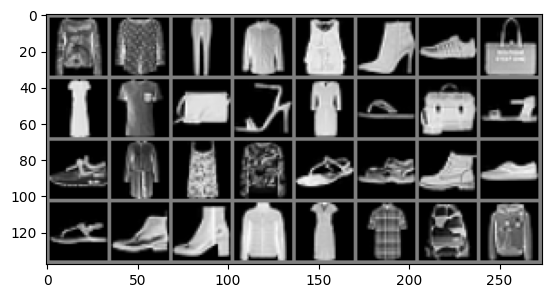

Pullover Pullover Trouser Coat  T-shirt/top Ankle boot Sneaker Bag   Dress T-shirt/top Bag   Sandal Dress Sandal Bag   Sandal Sneaker Dress Shirt Pullover Sandal Sandal Ankle boot Sneaker Sandal Ankle boot Ankle boot Coat  Dress Shirt Bag   Pullover


In [ ]:
# Data visualization
def imshow(img):
    img = img * 0.5 + 0.5  # Denormalize from [-1, 1] to [0, 1]
    plt.imshow(img.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.show()

detailer = iter(trainloader)
imgs, labels = next(detailer)

imshow(torchvision.utils.make_grid(imgs))
print(' '.join(f'{fashion_mnist_labels[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# Lenet_architecture
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)

In [25]:
#training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
num_epochs = 20
net.to(device)  
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
epoch_losses = []
epoch_accs = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  


        # statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()


    # epoch metrics
    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100

    epoch_losses.append(epoch_loss)  
    epoch_accs.append(epoch_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}% | '
          f'Total samples: {total} | Batch size: {trainloader.batch_size}')

cuda
Epoch [1/20] | Loss: 0.7584 | Accuracy: 71.62% | Total samples: 60000 | Batch size: 32
Epoch [2/20] | Loss: 0.4841 | Accuracy: 82.51% | Total samples: 60000 | Batch size: 32
Epoch [3/20] | Loss: 0.4322 | Accuracy: 84.32% | Total samples: 60000 | Batch size: 32
Epoch [4/20] | Loss: 0.4057 | Accuracy: 85.08% | Total samples: 60000 | Batch size: 32
Epoch [5/20] | Loss: 0.3893 | Accuracy: 85.68% | Total samples: 60000 | Batch size: 32
Epoch [6/20] | Loss: 0.3759 | Accuracy: 86.08% | Total samples: 60000 | Batch size: 32
Epoch [7/20] | Loss: 0.3698 | Accuracy: 86.43% | Total samples: 60000 | Batch size: 32
Epoch [8/20] | Loss: 0.3603 | Accuracy: 86.75% | Total samples: 60000 | Batch size: 32
Epoch [9/20] | Loss: 0.3556 | Accuracy: 86.90% | Total samples: 60000 | Batch size: 32
Epoch [10/20] | Loss: 0.3495 | Accuracy: 87.18% | Total samples: 60000 | Batch size: 32
Epoch [11/20] | Loss: 0.3418 | Accuracy: 87.50% | Total samples: 60000 | Batch size: 32
Epoch [12/20] | Loss: 0.3393 | Accur

In [38]:
torch.save(net, "model.pth")

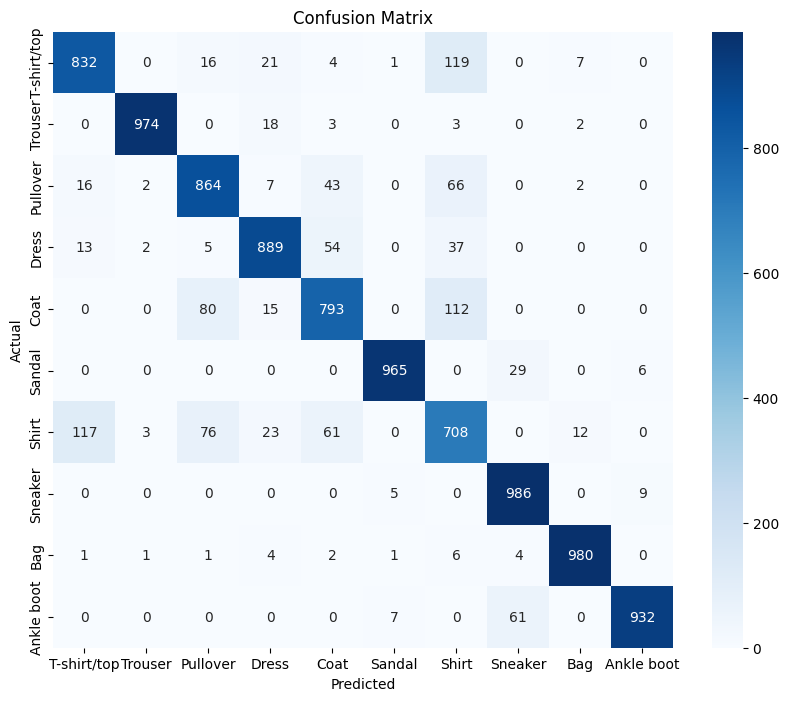

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.86      0.85      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.83      0.79      0.81      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.67      0.71      0.69      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.93      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

all_preds = []
all_labels = []

net.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        outputs = net(inputs)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=fashion_mnist_labels, 
            yticklabels=fashion_mnist_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(all_labels, all_preds, target_names=fashion_mnist_labels))

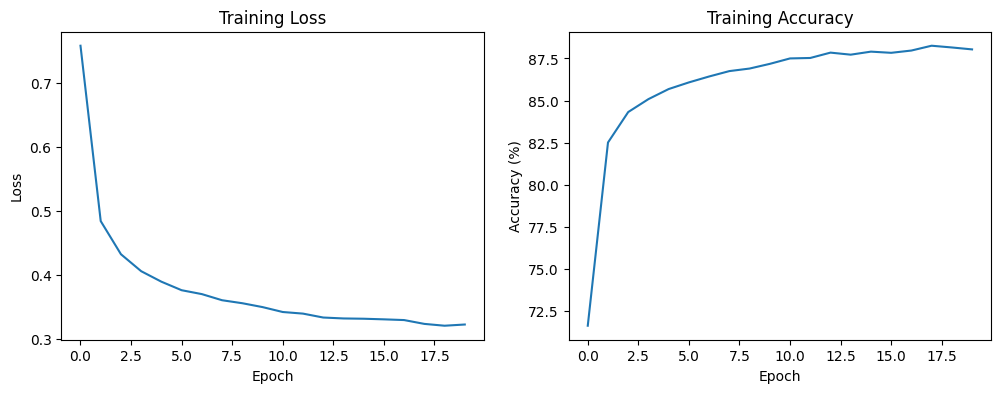

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epoch_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

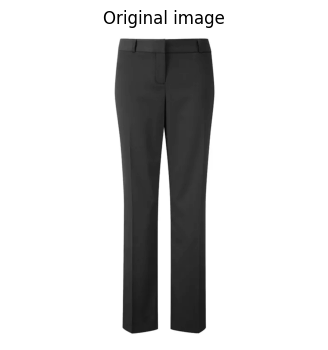

Predicted class index: 1
Predicted label: Trouser


C:\Users\nisch\AppData\Local\Temp\ipykernel_16936\4289693508.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net = torch.load("model.pth", map_location=device)


In [47]:
from PIL import Image

img_path = 'trouser.webp'
img = Image.open(img_path).convert("L")
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

img_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

img_tensor = img_transform(img).unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)

net = torch.load("model.pth", map_location=device)
net.to(device)
net.eval()

with torch.no_grad():
    output = net(img_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted class index: {predicted.item()}")

print(f"Predicted label: {fashion_mnist_labels[predicted.item()]}")

